<a href="https://colab.research.google.com/github/yahia-kplr/Data-Visualisation/blob/main/matplotlib/DataViz_avec_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La visualisation de données est une étape clé pour comprendre l’ensemble des données et en tirer des conclusions. Bien qu’il soit toujours possible d’inspecter de près les données ligne par ligne, cellule par cellule, c’est souvent une tâche fastidieuse qui ne met pas en évidence la vue d’ensemble. Les visuels, en revanche, définissent les données sous une forme facile à comprendre d’un simple coup d’œil et permettent de garder l’attention du public.

Matplotlib est une bibliothèque de traçage 2D avec Python 2D qui produit des tracés de qualité dans une variété de formats et d’environnements interactifs sur toutes les plateformes.

matplotlib.org

Matplotlib est une bibliothèque de base qui offre des options pour différents tracés ainsi que des personnalisations étendues sous forme d’étiquettes, de titres, de taille de police, etc.
Pour mieux comprendre Matplotlib, j’ai pris l’ensemble des données de densité de population de Kaggle et j’ai commencé à créer mes propres visualisations. Cet article met en évidence les tracés que j’ai obtenu, y compris les personnalisations et les conclusions/déductions que j’en ai tirées.

# Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

Comme toujours, nous devons d’abord importer toutes les bibliothèques nécessaires. Nous importons les bibliothèques NumPy et Pandas pour le traitement des données. Nous importons ensuite Matplotlib et utilisons son module pyplot pour le tracé de nos données et cm pour la palette de couleurs. La commande %matplotlib inline garantit que tous les tracés apparaissent en ligne dans le notebook.

## Importation du jeu de données

Les quatre premières lignes du fichier dataset.csv ne sont pas nécessaires pour que nous puissions importer les données dans la variable dataset. On peut sauter ces quatre premières lignes. Nous utilisons ensuite .head() pour vérifier les données.

In [2]:
dataset = pd.read_csv('world_population_dataset.tsv', sep = "\t")
dataset.head()

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54208.0      55434.0      56234.0      56699.0      57029.0   
1  130836765.0  134159786.0  137614644.0  141202036.0  144920186.0   
2    8996967.0    9169406.0    9351442.0    9543200.0    9744772.0   
3   96396419.0   98407221.0  100506960.0  102691339.0  104953470.0   
4    5454938.0    5531451.0    5608499.0    5679409.0    5734995.0   

          1965  ...         2012         2013         2014         2015  \
0      57357.0  ...     102565.0     103165.0     103776.0     104339.0   
1  148769974.0  ...  547482863.0  562601578.0  578075373.0  593871847.0   
2    9956318.0  ...   31161378.0   32269592.0   33370804.0   34413603.0   
3  107289875.0  ...  370243017.0  380437896.0  390882979.0  401586651.0   
4    5770573.0  ...   25107925.0   26015786.0   26941773.0   27884380.0   

          2016         2017         2018         2019         2020  \
0     104865.0     105361.0     105846.0     106310.0     106766.0   
1  609978946.0  626392880.0  643090131.0  660046272.0  677243299.0   
2   35383028.0   36296111.0   37171922.0   38041757.0   38928341.0   
3  412551299.0  423769930.0  435229381.0  446911598.0  458803476.0   
4   28842482.0   29816769.0   30809787.0   31825299.0   32866268.0   

          2021  
0     107195.0  
1  694665117.0  
2   39835428.0  
3  470898870.0  
4   33933611.0  

[5 rows x 66 columns]

Nous voyons immédiatement certaines colonnes qui ne nous concernent pas. Tout d’abord, nous pouvons conserver le nom du pays (Country Name) mais nous pouvons supprimer le code du pays (Country Code). Comme nous savons que nous avons affaire à des densités de population, nous pouvons laisser tomber les colonnes de nom et code de l’indicateur (Indicator Name & Indicator Code). Ensuite, les colonnes pour les années 1960 et 2016 ont des valeurs manquantes NaN. NaN signifie « Not a Number ». Nous devrions donc supprimer ces colonnes car elles ne fournissent aucune information. Enfin, il y a une colonne sans nom qui a également des valeurs NaN, nous pouvons donc supprimer la colonne Unnamed : 61 également.



In [3]:
dataset.drop(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '2016'], axis = 1, inplace = True)
dataset.dropna(how = 'any', axis = 0, inplace = True)
dataset.isnull().sum()

Country Name    0
1961            0
1962            0
1963            0
1964            0
               ..
2017            0
2018            0
2019            0
2020            0
2021            0
Length: 61, dtype: int64

Nous supprimons toutes les lignes où il peut y avoir des valeurs vides ou nulles en utilisant la méthode dropna. Puis nous vérifions si aucune colonne n’a de valeurs nulles en utilisant dataset.isull().sum(). Nous constatons que toutes les lignes présentent 0 valeur nulle.

Nous sommes maintenant prêts à visualiser nos données.

# Visualisation de données

Maintenant, nous allons utiliser Matplotlib pour créer nos graphiques et utiliser ces visualisations pour en tirer des conclusions significatives.

## Tracé linéaire

Nous commençons par analyser la densité de la population d’Aruba au cours des années en utilisant un graphique linéaire. Nous prenons les années sur l’axe des x et la densité de population sur l’axe des y.

Nous sélectionnons les valeurs x avec dataset.columns[1 :], ce qui sélectionne toutes les colonnes sauf la première car nous n’avons besoin que des années et non de la colonne Country Name.
Ensuite, nous sélectionnons les valeurs y avec dataset.iloc[0][1 :], ce qui sélectionne la première colonne, c’est-à-dire le pays Aruba et toutes les colonnes sauf la première. Le nom du pays peut être obtenu à l’aide de dataset.iloc[0][0]. Pour tracer le graphique, il suffit d’utiliser la fonction plot et de définir les paramètres comme x et y pour l’axe des x et l’axe des y respectivement.

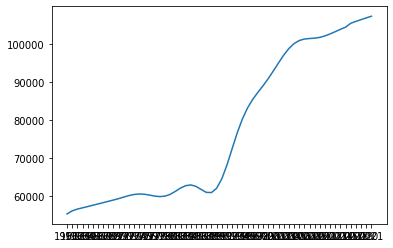

In [4]:
x = dataset.columns[1:]
y = dataset.iloc[0][1:]
country = dataset.iloc[0][0]
plt.plot(x, y)

Oui, il fait le taff mais il est très difficile de le comprendre. Il n’y a pas d’étiquettes et les valeurs des axes se chevauchent. C’est là que la capacité de personnalisation de matplotlib sera utile. Rendons-le un peu plus facile à interpréter.

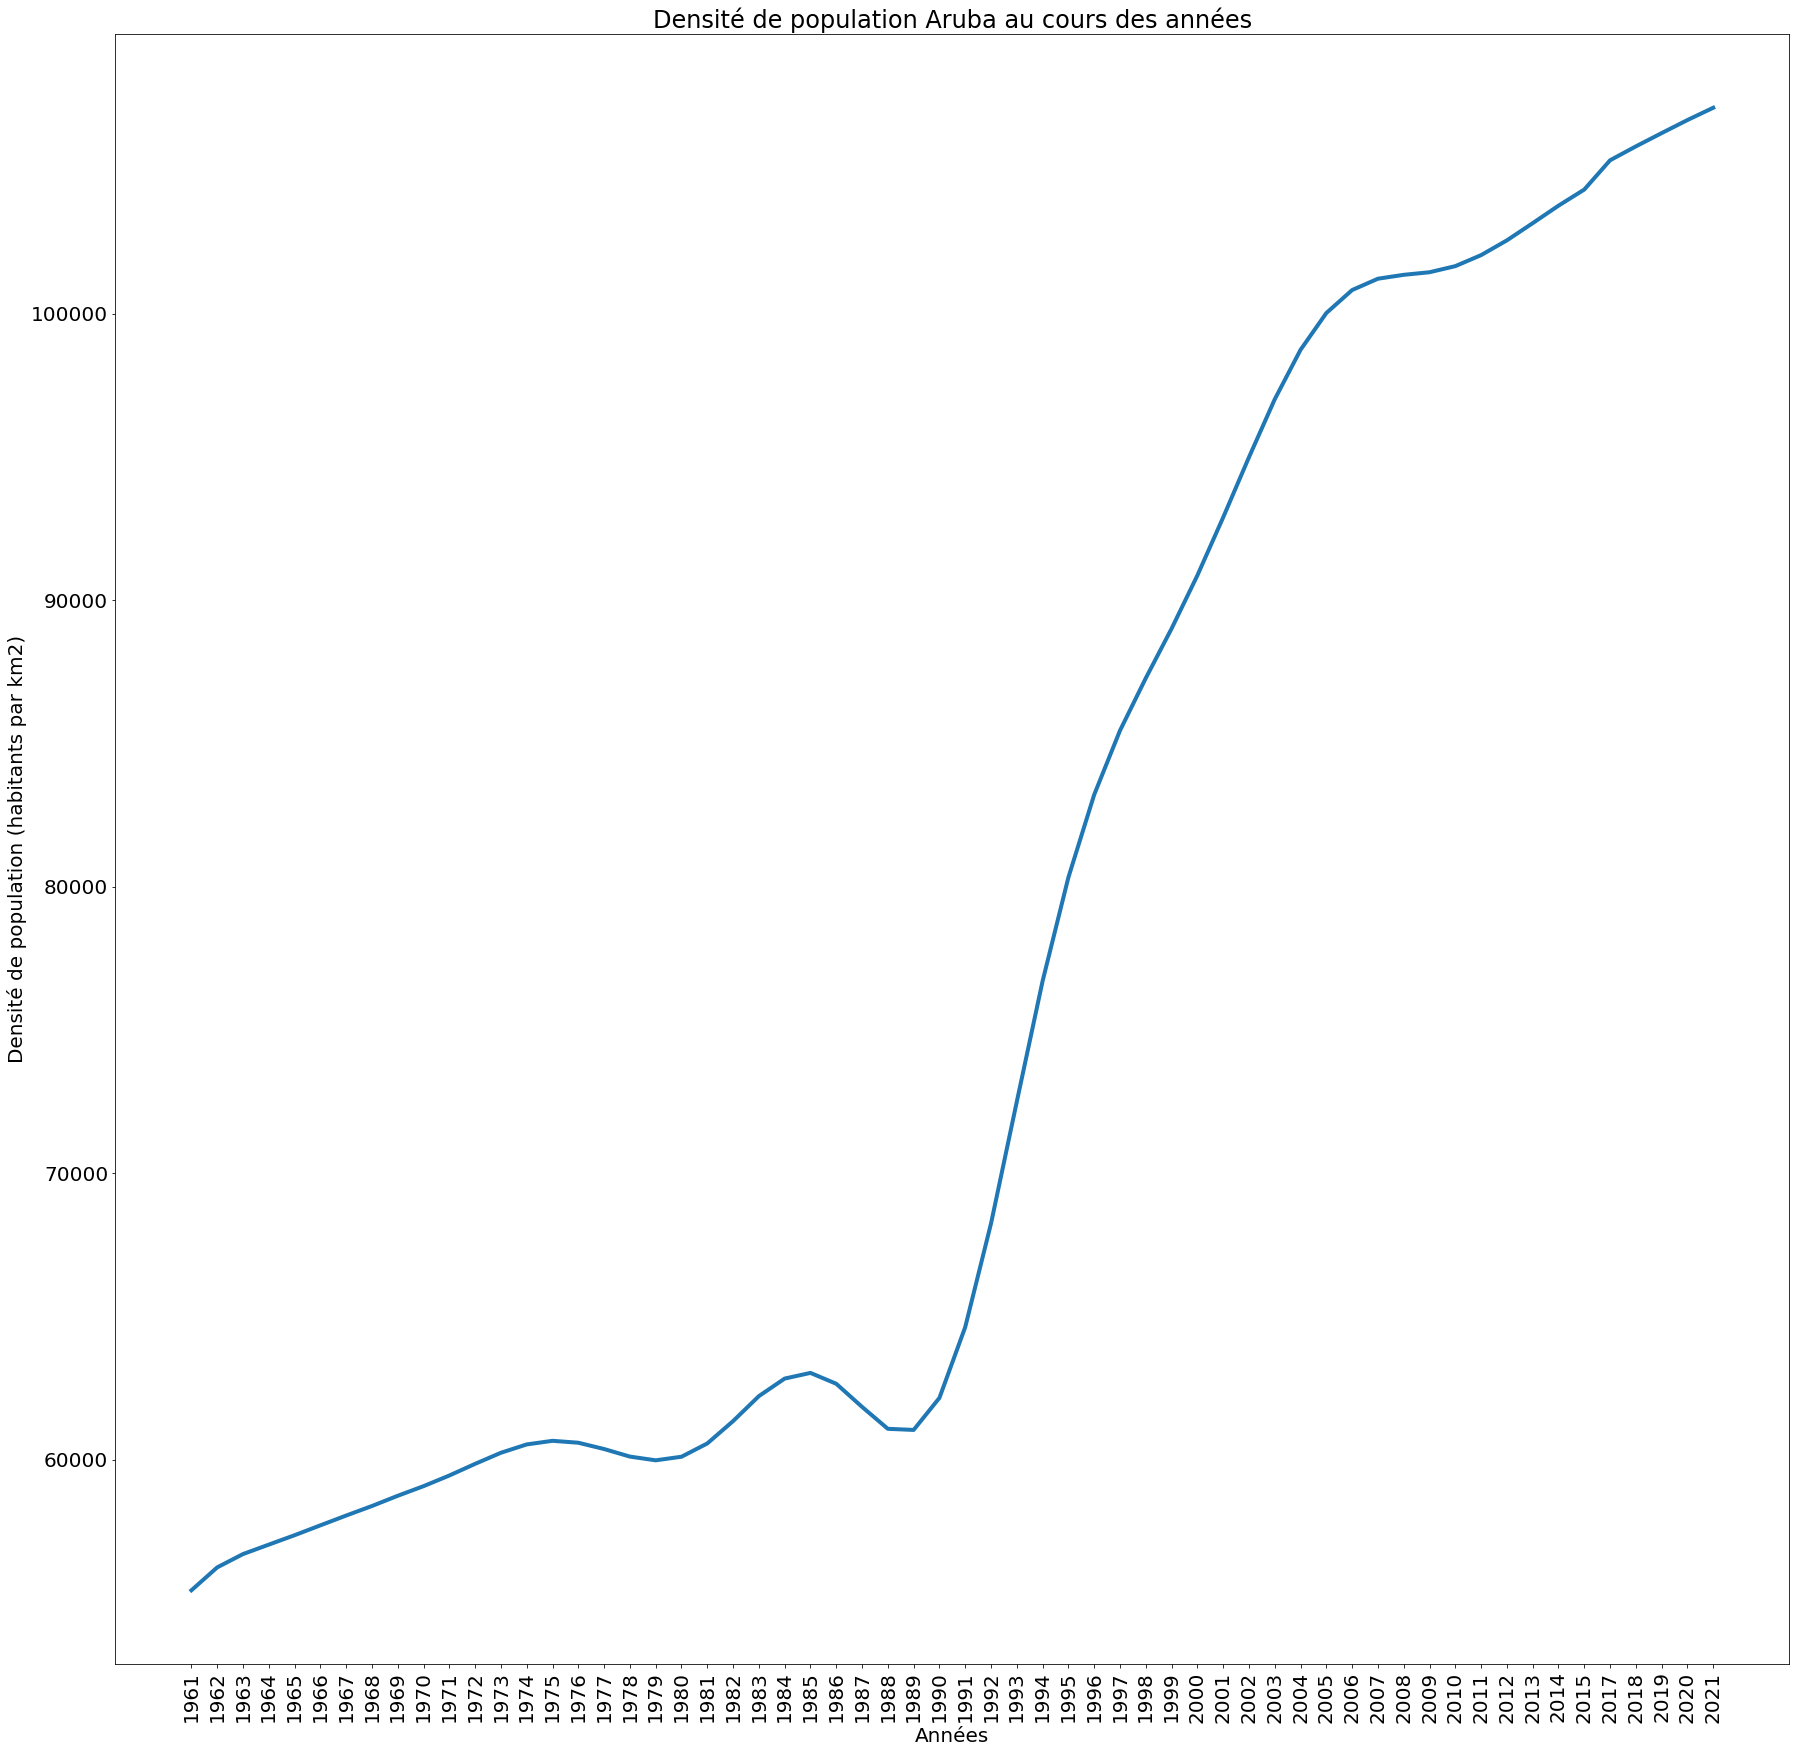

In [5]:
plt.rcParams['figure.figsize'] = (30, 30)
plt.rcParams['font.size'] = '20'
plt.title('Densité de population ' + country + ' au cours des années')
plt.xlabel('Années')
plt.xticks(rotation = '90')
plt.ylabel('Densité de population (habitants par km2)')
plt.plot(x, y, linewidth = 4)

Les paramètres rcParams nous permettent de modifier la taille des chiffres, la taille des polices et bien plus encore. Nous ajoutons ensuite un titre, les étiquettes des axes avec xlabel et ylabel. xticks nous permet de définir l’angle de rotation de notre texte, que nous fixons à 90 degrés. Nous traçons ensuite à nouveau et définissons la largeur de la ligne à 4.

Nous pouvons maintenant voir que le graphique est beaucoup plus clair avec seulement quelques modifications.

Le graphique ci-dessus montre que la densité de la population a augmenté régulièrement jusqu’aux années 1980. À partir des années 1990, la densité a augmenté de façon spectaculaire et a continué à croître de la même façon jusqu’à ce qu’elle se stabilise au milieu des années 2000.

Nous pouvons également utiliser des graphiques linéaires pour voir la tendance dans les différents pays. Nous prenons les 5 premiers pays et comparons la croissance de leur densité de population. Comme nous avons maintenant plusieurs lignes sur un seul graphique, nous devons utiliser des couleurs différentes pour chaque pays et définir une légende qui attribue une couleur unique à chaque pays.

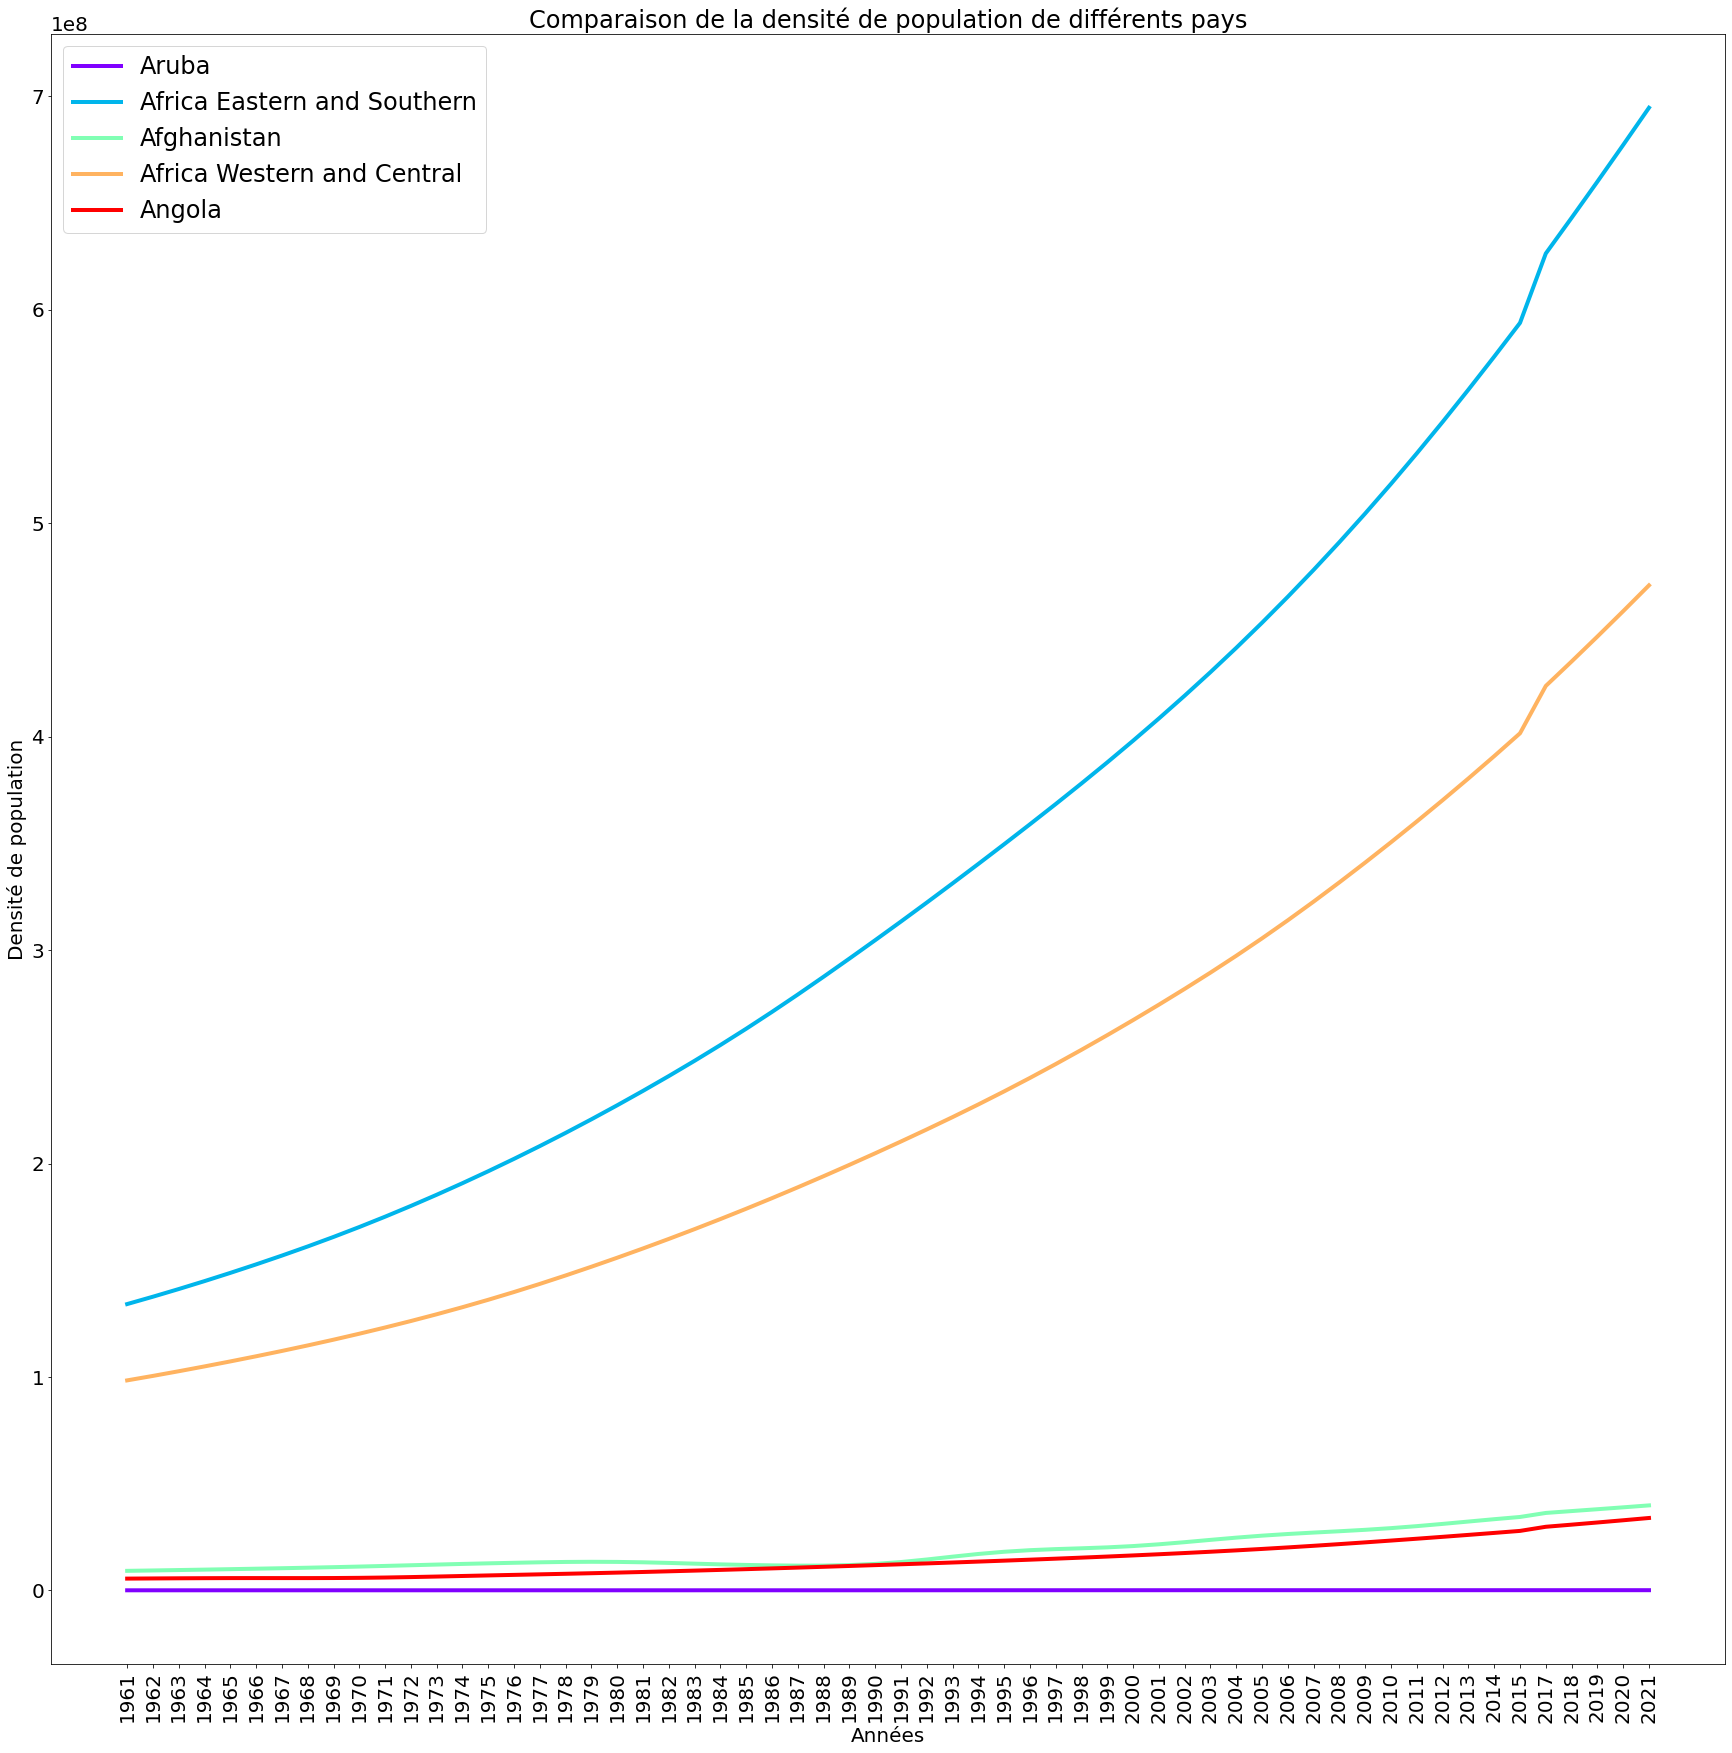

In [6]:
x = dataset.columns[1:]
colors = cm.rainbow(np.linspace(0, 1, 5))
for index in range(5):
    y = dataset.iloc[index][1:]
    plt.plot(x, 
             y, 
             c = colors[index],
             label = dataset.iloc[index][0],
             linewidth = 4)
    plt.title('Comparaison de la densité de population de différents pays')
    plt.xlabel('Années')
    plt.xticks(rotation = '90')
    plt.ylabel('Densité de population')
    plt.legend(prop = {'size': 24})

Ici, nous faisons une boucle à travers les 5 premières lignes de l’ensemble de données et traçons les valeurs sous forme de graphique linéaire. Nous sélectionnons les couleurs en utilisant le paquet cm de matplotlib et sa méthode rainbow. Dans la méthode plot, nous devons spécifier le paramètre label car il garantit que lorsque la légende est activée, les noms sont affichés. La légende est activée en utilisant la méthode legend() où j’ai spécifié la propriété size à 24.



Nous pouvons constater que pour les 5 pays, Aruba, Andorre, l’Afghanistan, l’Angola et l’Albanie, il y a eu une augmentation de la densité de la population.

Maintenant que nous avons tracé tous les courbes linéaires sur une seule figure, il est très facile de voir qu’Aruba a toujours eu une densité de population plus élevée par rapport aux 4 autres pays.

## Diagramme en barres

Le diagramme en barres peut être facilement créé en utilisant la méthode bar() avec les arguments pertinents. Nous commençons par tracer la densité de population de tous les pays pour l’année 2015.

<BarContainer object of 262 artists>

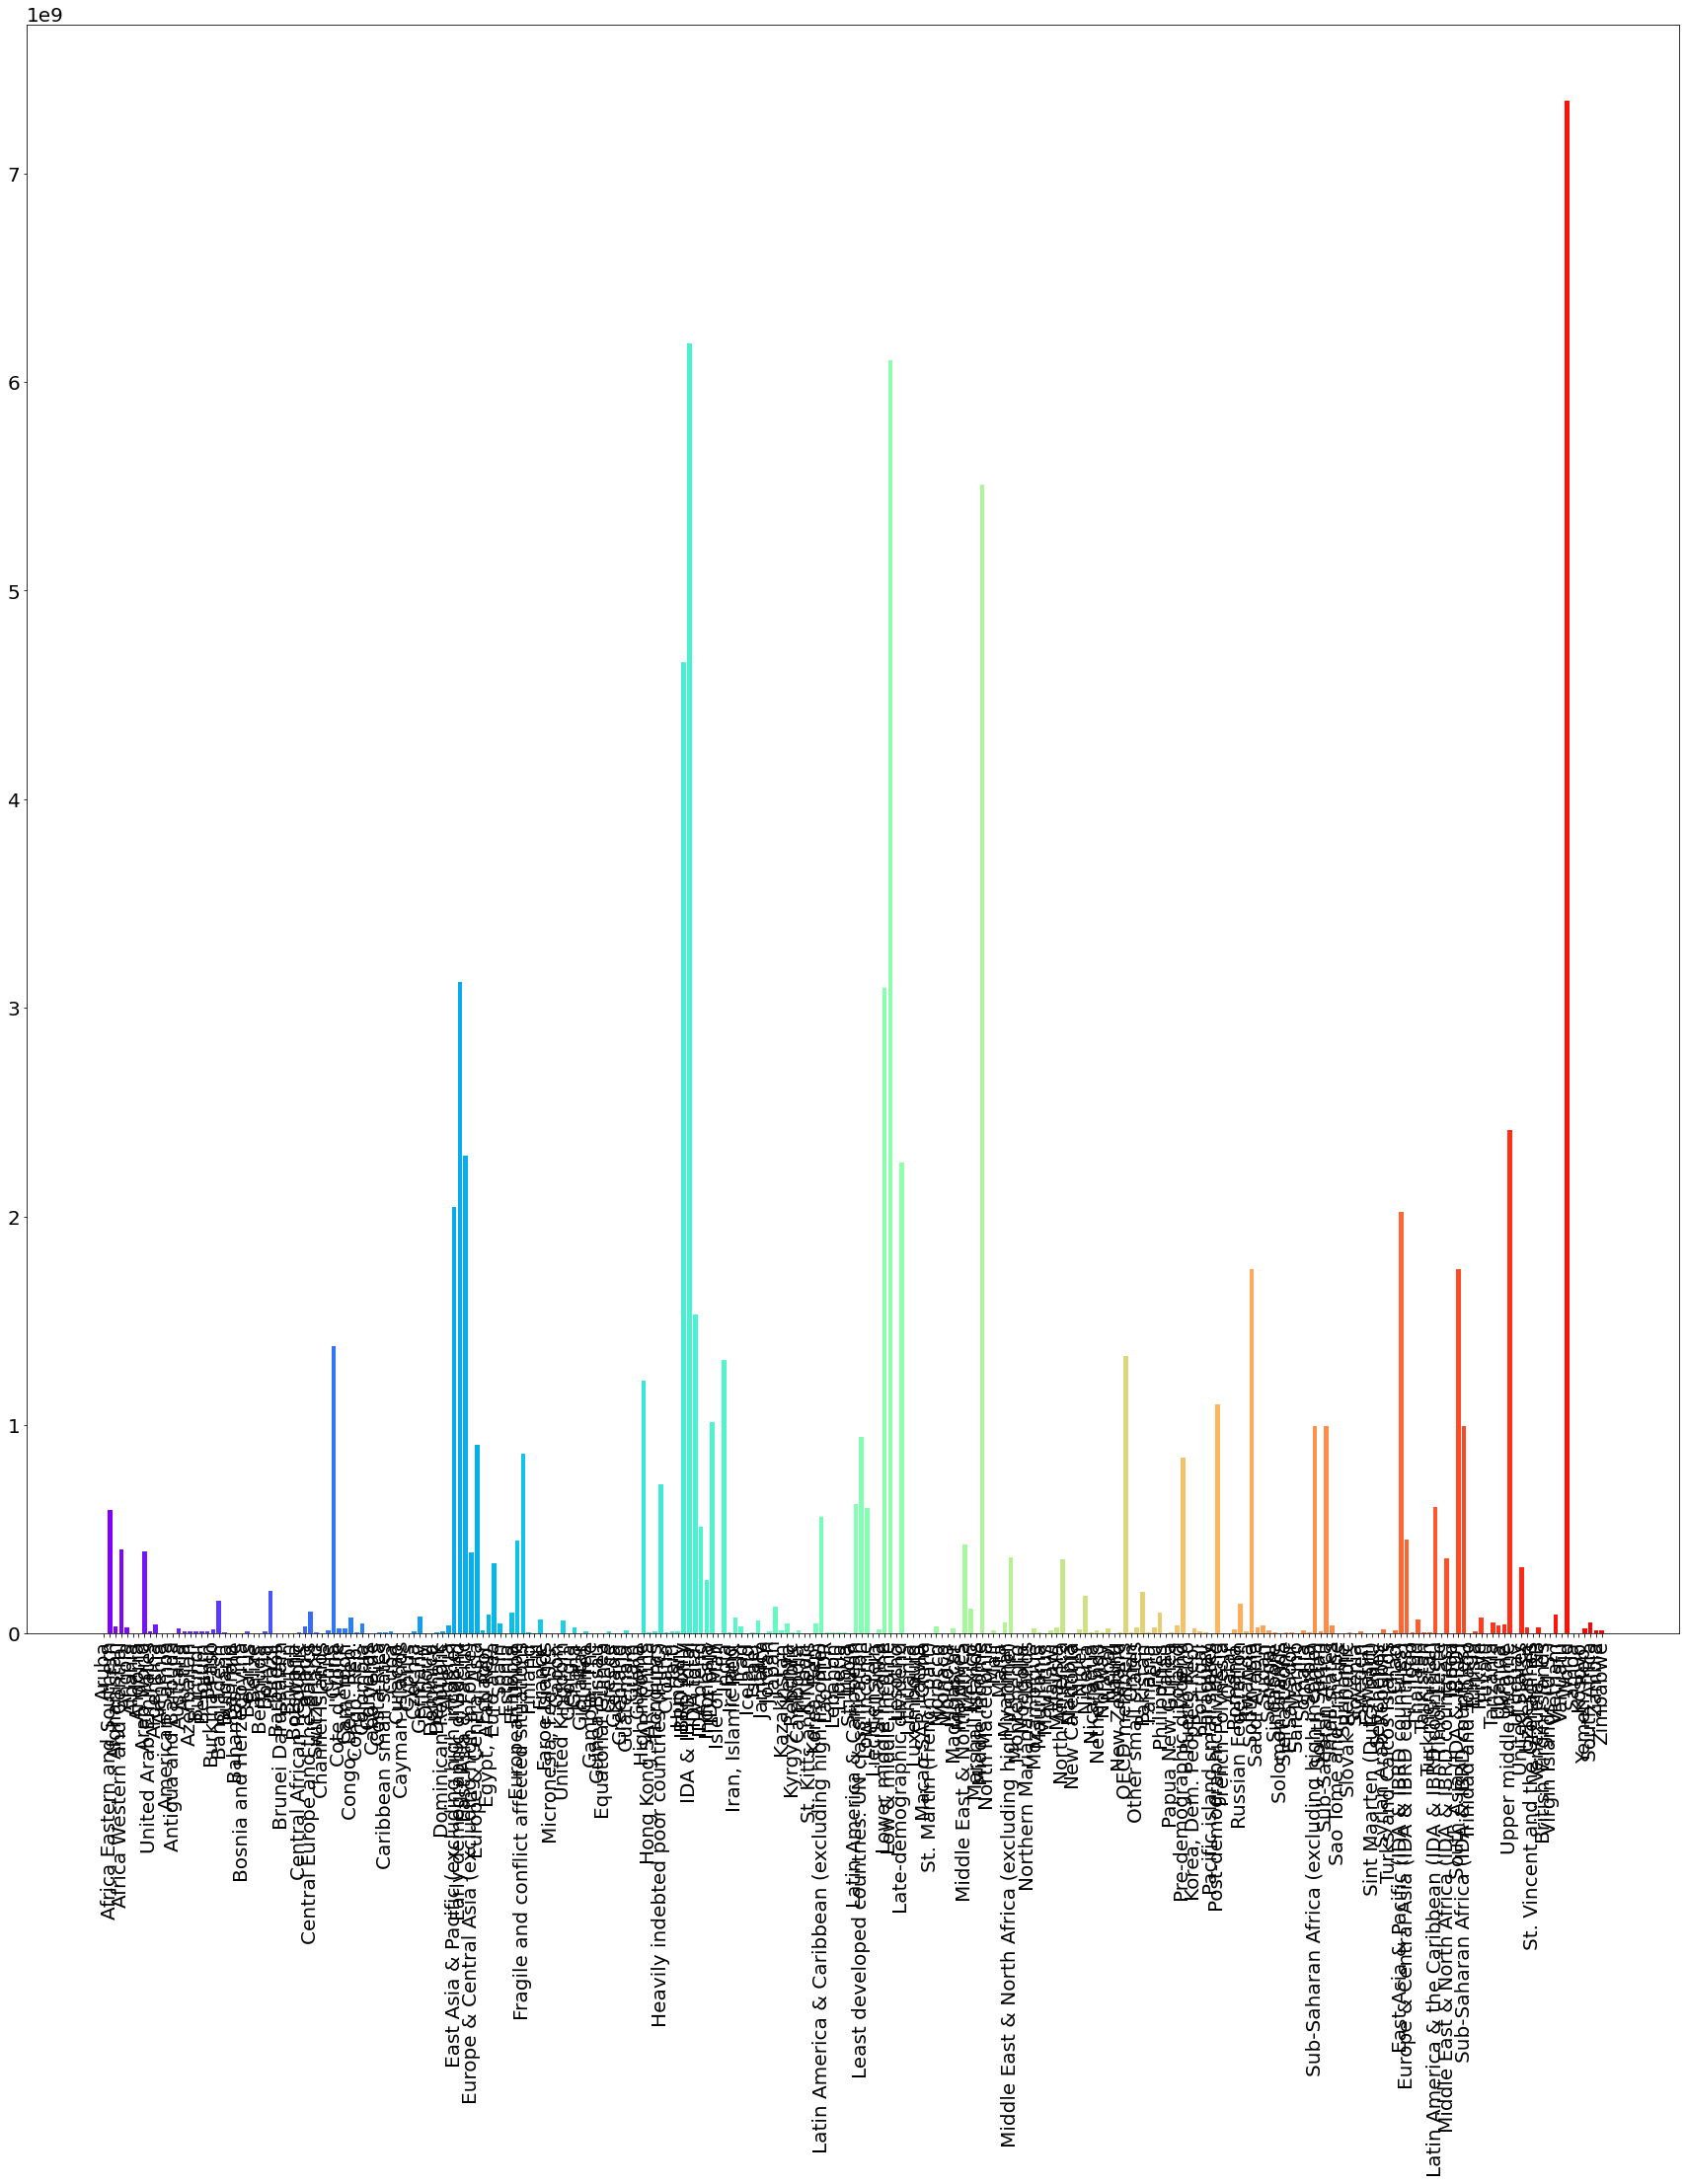

In [7]:
countries = dataset['Country Name']
populationDensity2015 = dataset['2015']
plt.xticks(rotation = '90')
plt.bar(countries, populationDensity2015, color = cm.rainbow(np.linspace(0, 1, len(countries))))

Puisque le graphique tente de fournir beaucoup d’informations en même temps, il ne fournit pas vraiment d’information utile. Les étiquettes de l’axe des x se chevauchent tellement que l’ensemble du graphique est inutile. Nous devons non seulement visualiser notre ensemble de données, mais aussi visualiser intelligemment les parties importantes de notre ensemble de données. Il est préférable de trier les 10 premiers pays avec la densité maximale et de les examiner.

<BarContainer object of 10 artists>

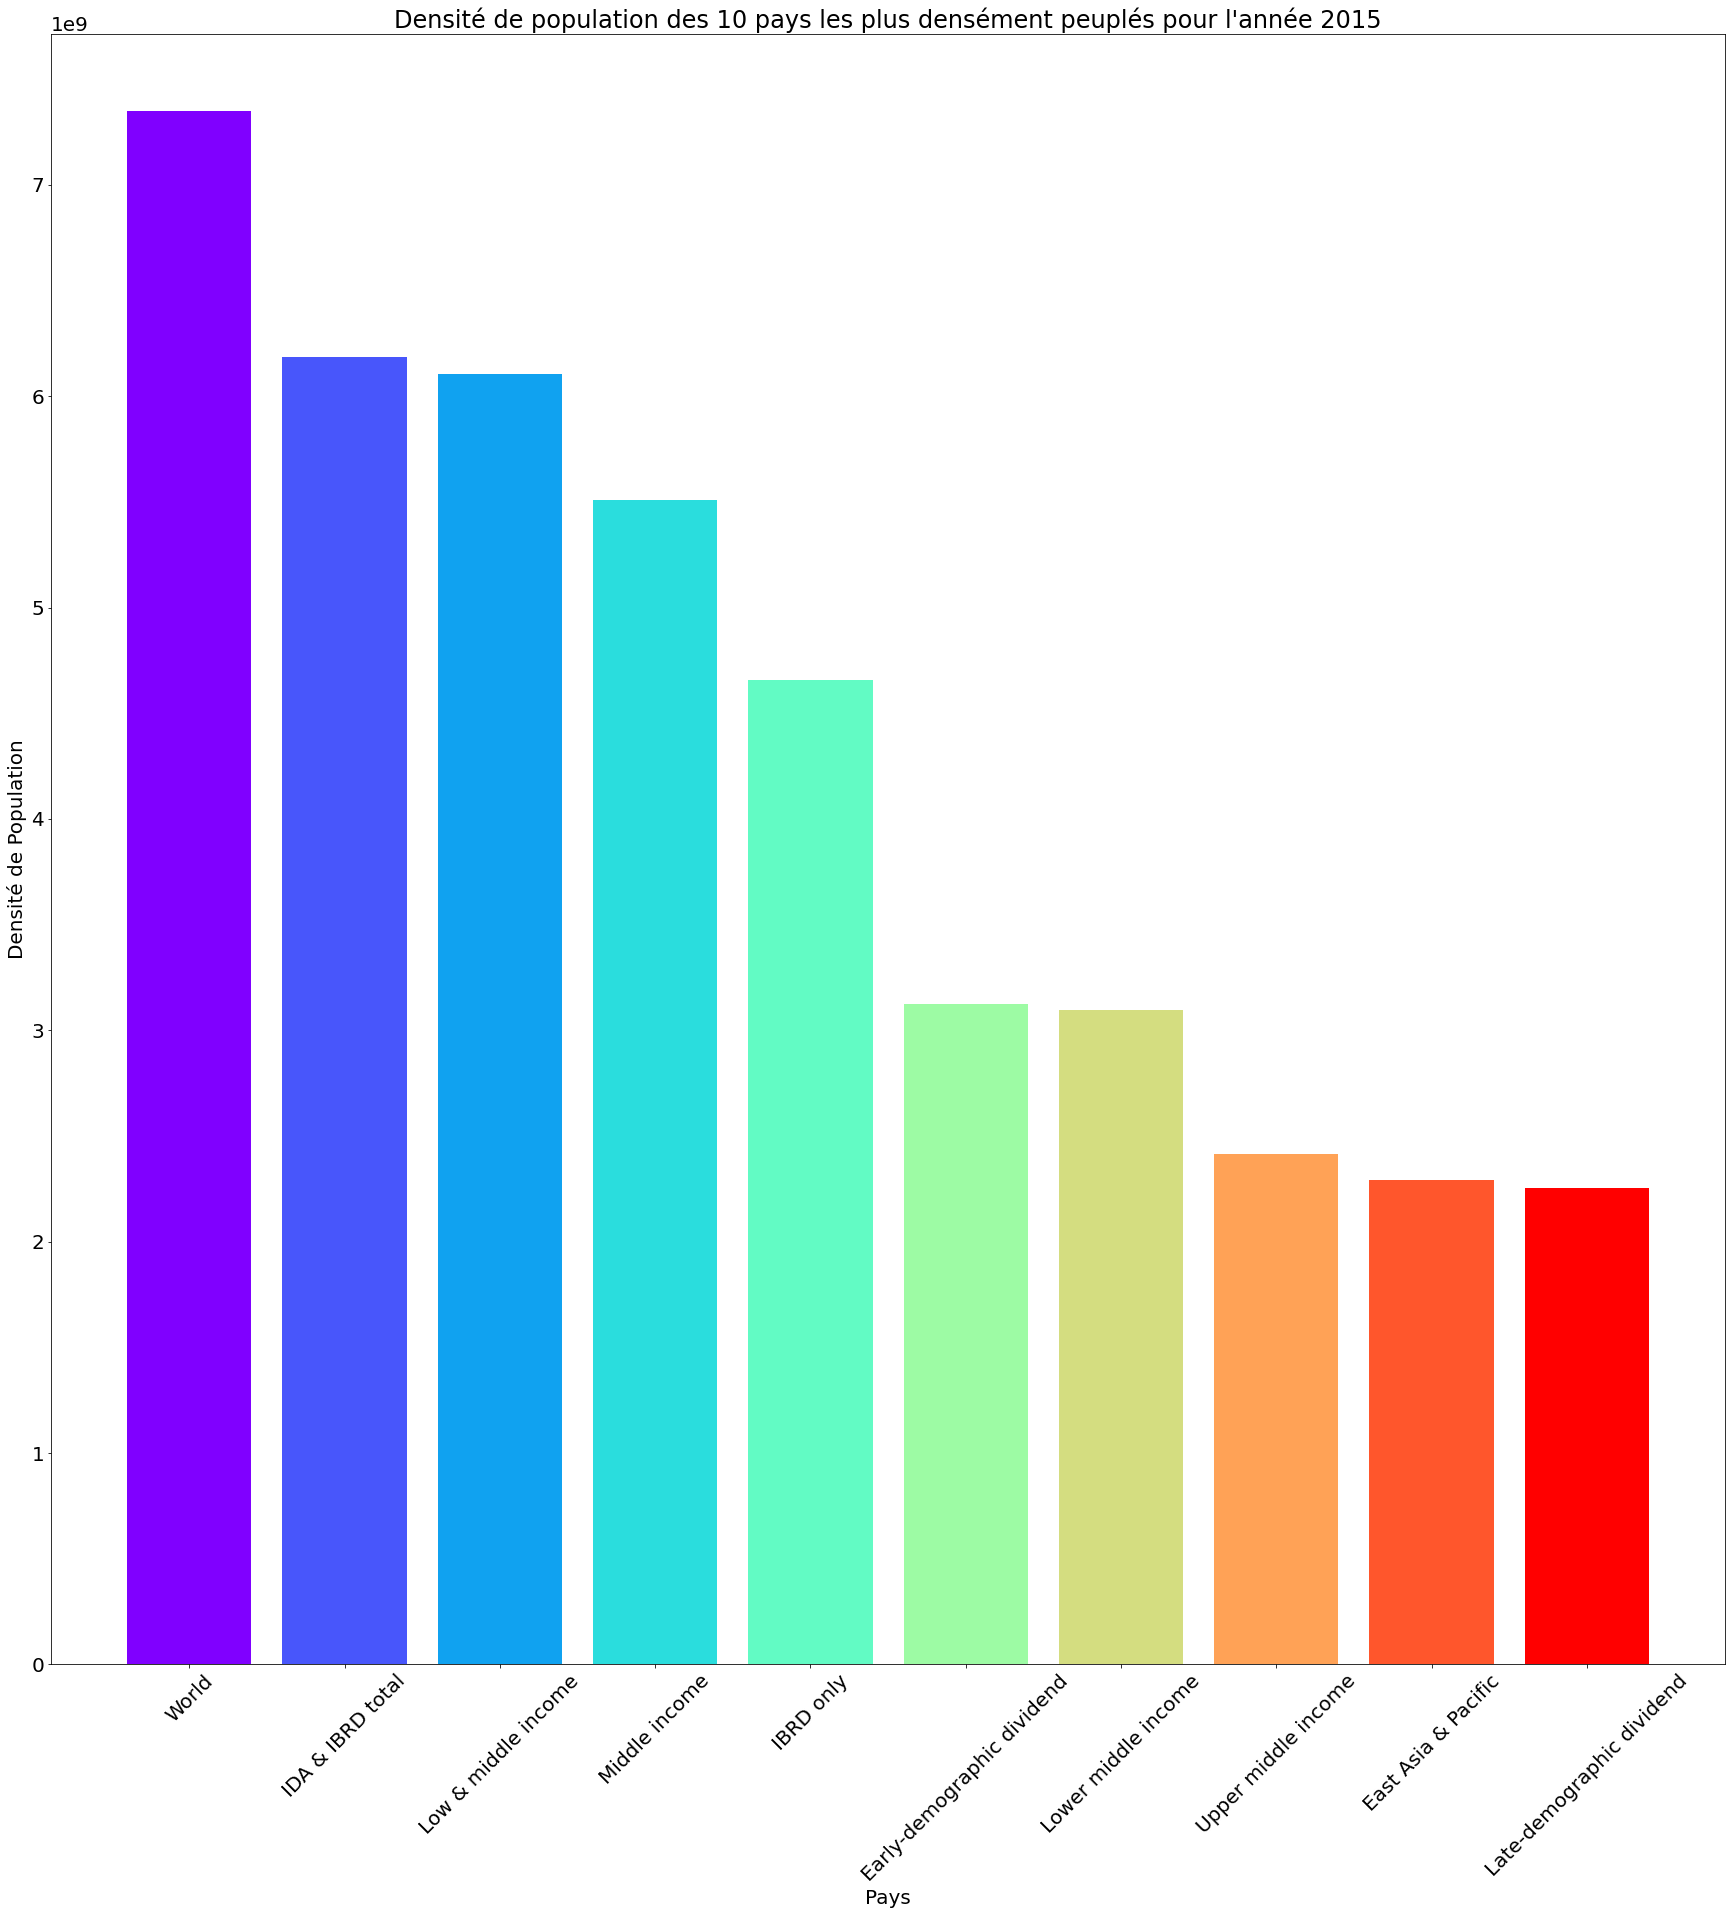

In [8]:
top10 = dataset.sort_values('2015', ascending = False).head(10)
plt.xticks(rotation = '45')
plt.title("Densité de population des 10 pays les plus densément peuplés pour l'année 2015")
plt.xlabel('Pays')
plt.ylabel('Densité de Population')
plt.bar(top10['Country Name'],
        top10['2015'],
        color = cm.rainbow(np.linspace(0, 1, len(top10))))

Nous trions d’abord les pays en utilisant la méthode sort_values basée sur la densité de population de l’année 2015 et par ordre décroissant. Nous sélectionnons ensuite les 10 premiers pays en utilisant la méthode head(10). Nous traçons ensuite notre diagramme à barres avec ces nouvelles données.



L’information est bien claire maintenant. Les données sont espacées de manière égale et représentées distinctement par des couleurs différentes.

Macao SAR et Monaco ont la plus forte densité de population parmi tous les autres pays disponibles dans l’ensemble de données pour l’année 2015.

<BarContainer object of 60 artists>

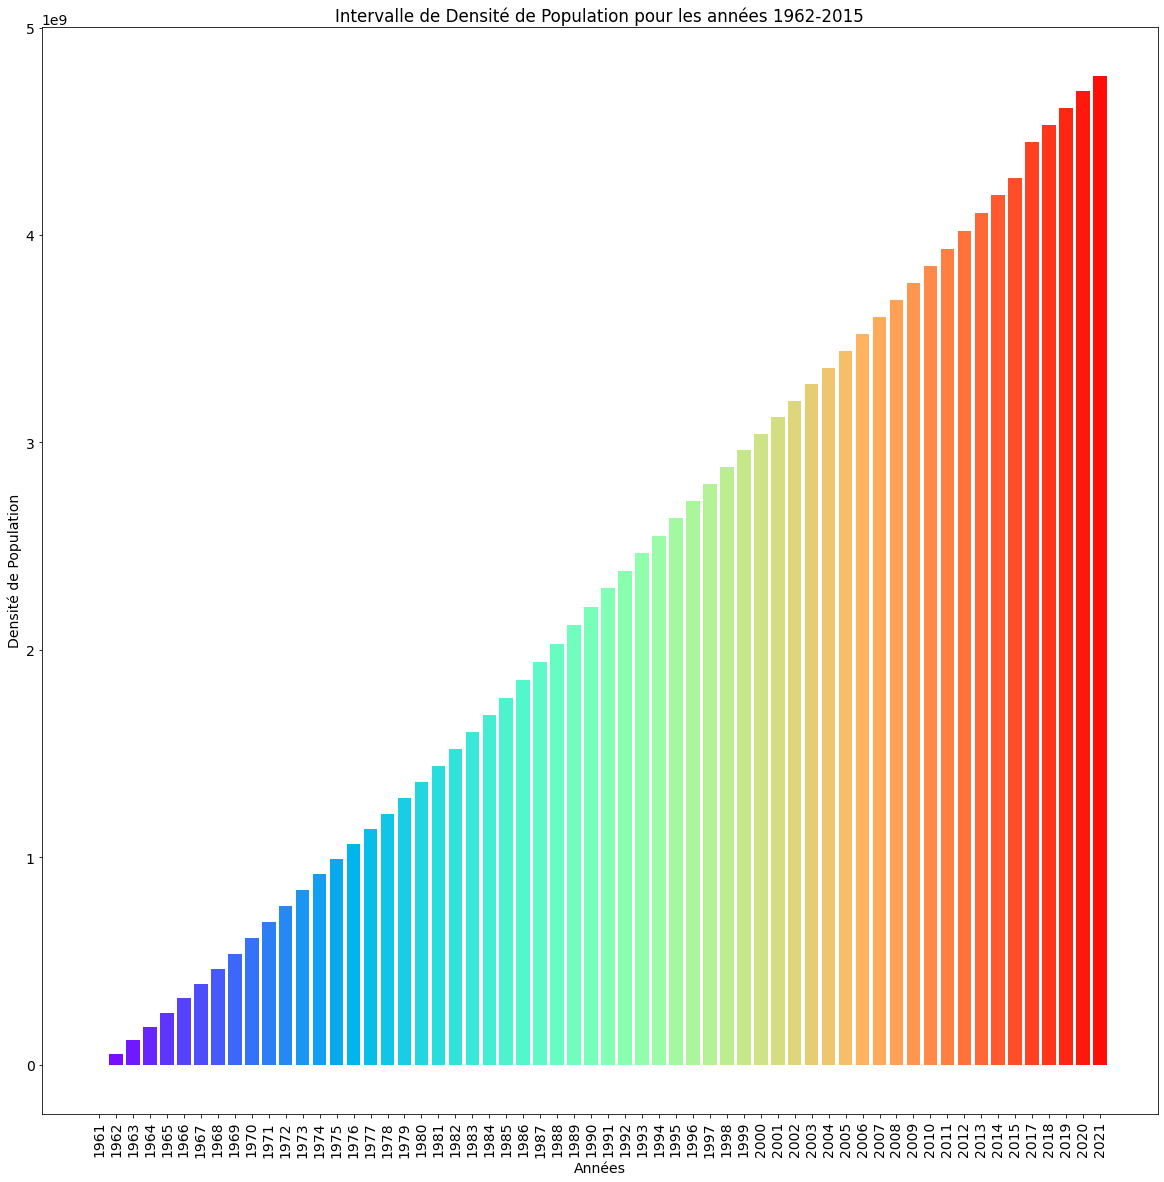

In [16]:
minimum = dataset.loc[:, dataset.columns != 'Country Name'].min()
maximum = dataset.loc[:, dataset.columns != 'Country Name'].max()
diff = maximum - minimum
minOfMax = maximum.min()
plt.title('Intervalle de Densité de Population pour les années 1962-2015')
plt.xticks(rotation = '90')
plt.xlabel('Années')
plt.ylabel('Densité de Population')
plt.bar(dataset.columns[1:], diff.apply(lambda x: x-minOfMax), color = cm.rainbow(np.linspace(0, 1, dataset.shape[1])))